<a href="https://colab.research.google.com/github/gopsthv/nlp-project/blob/main/nlp_ass_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [7]:
df = pd.read_csv("email.csv")


In [8]:
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Category'] = encoder.fit_transform(df['Category']) #this line of code basically oncodes ham and spam to the
                                                       #binary 0 and 1 respectively.

In [12]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

,0
Category,0
Message,0


In [14]:
#check for duplicate values and remove them
df.duplicated().sum()
df = df.drop_duplicates(keep = 'first')

In [15]:
df['Category'].value_counts()

,count
Category,
0,4516
1,641
2,1


In [17]:
df.drop(df[df['Category'] == 2].index, inplace=True)

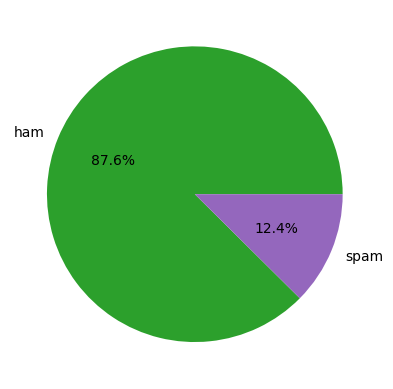

In [18]:
colors = ['#2ca02c', '#9467bd']
plt.pie(df['Category'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.1f%%", colors = colors)
plt.show()

In [19]:
nltk.download('punkt') #its a package for preprocessing data for further analysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['no_characters'] = df['Message'].apply(len) # numberof characters in a message

In [21]:
#no of words in a message
df['no_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()


,Category,Message,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
#sentence
df['no_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.describe()


,Category,no_characters,no_words,no_sentences
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
#we now view the desriptive statistics of ham
df[df['Category'] == 0][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='no_characters', ylabel='Count'>

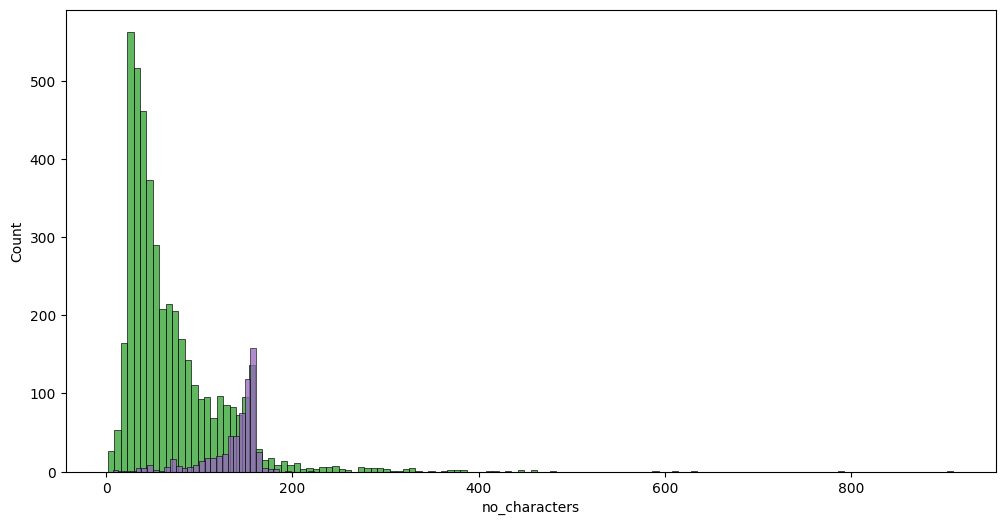

In [26]:
plt.figure(figsize= (12,6))
sns.histplot(df[df['Category'] == 0]['no_characters'],color = '#2ca02c')
sns.histplot(df[df['Category'] == 1]['no_characters'],color = '#9467bd')

<Axes: xlabel='no_words', ylabel='Count'>

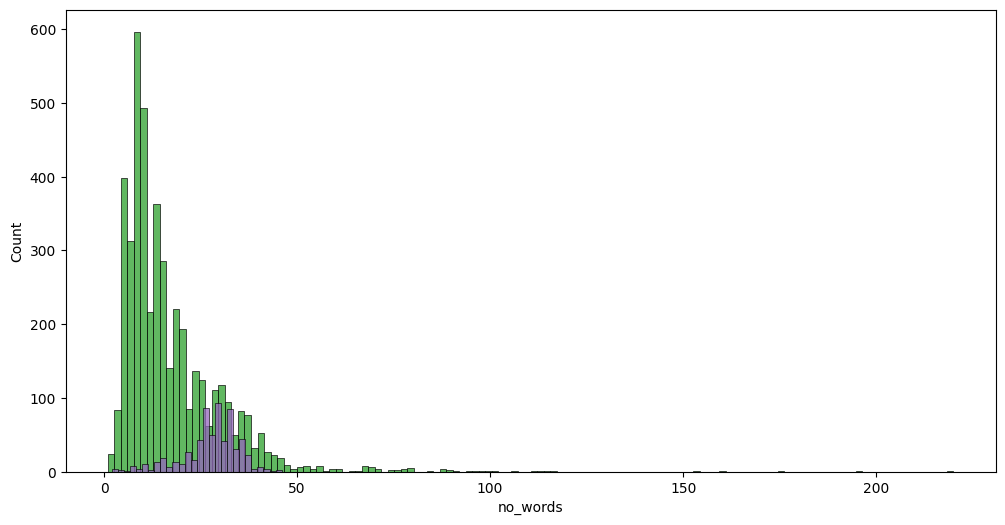

In [27]:
plt.figure(figsize= (12,6))
sns.histplot(df[df['Category'] == 0]['no_words'],color = '#2ca02c')
sns.histplot(df[df['Category'] == 1]['no_words'],color = '#9467bd')

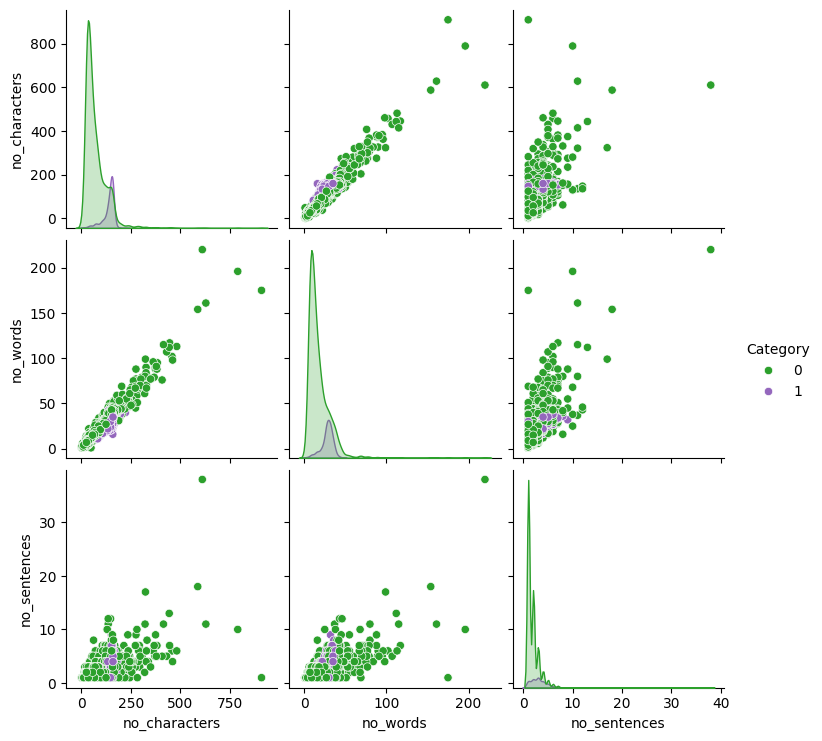

In [28]:
colors = ['#2ca02c', '#9467bd']
sns.pairplot(df, hue='Category', palette=colors)

# Show the plot
plt.show()
